Fatemeh Amanian

Train neural network models (at least two different networks for each dataset, i.e., no. layers, no. neurons, activation, ...) in either Tensorflow or Pytorch to perform classification on the following datasets:

Cifar-100

In [1]:
import sys
from matplotlib import pyplot
import numpy as np
import PIL

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

Download the data:

In [2]:
from keras.datasets import cifar100
x = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [4]:
!mkdir /content/data
!mkdir /content/data/cifar100
!mv  -v /root/.keras/datasets/cifar-100-python/* /content/data/cifar100

mkdir: cannot create directory ‘/content/data’: File exists
mkdir: cannot create directory ‘/content/data/cifar100’: File exists
renamed '/root/.keras/datasets/cifar-100-python/file.txt~' -> '/content/data/cifar100/file.txt~'
renamed '/root/.keras/datasets/cifar-100-python/meta' -> '/content/data/cifar100/meta'
renamed '/root/.keras/datasets/cifar-100-python/test' -> '/content/data/cifar100/test'
renamed '/root/.keras/datasets/cifar-100-python/train' -> '/content/data/cifar100/train'


Import data:

In [5]:
path='./data/cifar100'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

train_batch = unpickle(path + "/train")
test_batch = unpickle(path + "/test")

train_labels = []

train_data = np.array(train_batch[b'data'])
train_labels.extend(np.array(train_batch[b'fine_labels']))
train_data = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(train_data.shape)
print(len(train_labels))

test_labels = []
test_data = np.array(test_batch[b'data'])
test_labels.extend(np.array(test_batch[b'fine_labels']))

test_data = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(test_data.shape)
print(len(test_labels))


import pickle
with open((path + "/meta"), 'rb') as fo:
    dic = pickle.load(fo, encoding='utf-8')
    classes = np.array(dic['fine_label_names'])

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
10000


Normalization:

In [6]:
train_set = ((train_data/255.0), np.asarray(train_labels))
test_set = (test_data/255.0, np.asarray(test_labels))
# (x_train-x_train.mean())/x_train.std()
print(train_set[0].shape, train_set[1].shape)
print(test_set[0].shape, test_set[1].shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


cattle
dinosaur
apple


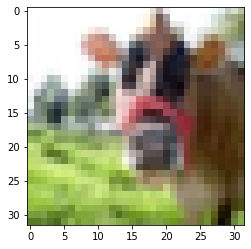

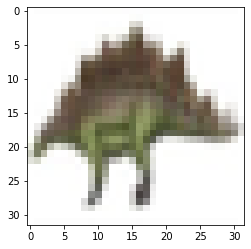

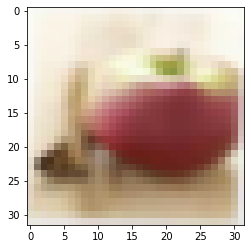

In [7]:
for i in range(0,3):
    pyplot.figure()
    pyplot.imshow(train_set[0][i])
    print(classes[train_set[1][i]])

Define a Convolutional Neural Network
Using cifar10 first networks to compare

In [8]:
from tensorflow.keras.layers import Dropout
model1 = Sequential()
model1.add(Conv2D(32, (6, 6), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.4))
model1.add(Dense(198, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.4))
model1.add(Dense(100, activation='softmax'))

Define a Loss function and optimizer

In [9]:
# compile model
opt1 = SGD(lr=0.001, momentum=0.9)
model1.compile(optimizer=opt1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize

In [10]:
epochs=30
# fit model
history1 = model1.fit(train_set[0], train_set[1], epochs=epochs, batch_size=64, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc1 = model1.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc1 * 100.0))

Epoch 1/30
782/782 [==============================] - 6s 8ms/step - loss: 4.5116 - accuracy: 0.0268 - val_loss: 4.2899 - val_accuracy: 0.0690
Epoch 2/30
782/782 [==============================] - 6s 7ms/step - loss: 4.2393 - accuracy: 0.0583 - val_loss: 4.0106 - val_accuracy: 0.1039
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 4.0432 - accuracy: 0.0836 - val_loss: 3.8042 - val_accuracy: 0.1434
Epoch 4/30
782/782 [==============================] - 6s 7ms/step - loss: 3.8862 - accuracy: 0.1116 - val_loss: 3.6383 - val_accuracy: 0.1759
Epoch 5/30
782/782 [==============================] - 6s 7ms/step - loss: 3.7565 - accuracy: 0.1300 - val_loss: 3.5191 - val_accuracy: 0.1920
Epoch 6/30
782/782 [==============================] - 6s 7ms/step - loss: 3.6452 - accuracy: 0.1512 - val_loss: 3.4276 - val_accuracy: 0.2017
Epoch 7/30
782/782 [==============================] - 6s 7ms/step - loss: 3.5549 - accuracy: 0.1665 - val_loss: 3.3422 - val_accuracy: 0.2212
Epoch 

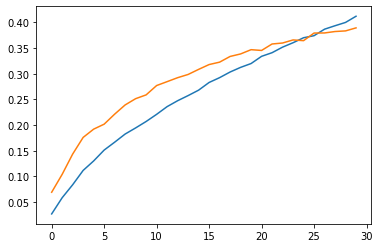

In [11]:
pyplot.plot(range(0,epochs), history1.history['accuracy'])
pyplot.plot(range(0,epochs), history1.history['val_accuracy'])

Model 2:

In [17]:
# Create the model 2
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(100, activation='softmax'))
# compile model 2
model2.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [18]:
epochs2=30
# fit model
history2 = model2.fit(train_set[0], train_set[1], epochs=30, batch_size=50, validation_data=(test_set[0], test_set[1]), verbose=1)
# evaluate model
_, acc2 = model2.evaluate(test_set[0], test_set[1], verbose=1)
print('> %.3f' % (acc2 * 100.0))

Epoch 1/30
1000/1000 [==============================] - 4s 4ms/step - loss: 4.1754 - accuracy: 0.0545 - val_loss: 3.8238 - val_accuracy: 0.1072
Epoch 2/30
1000/1000 [==============================] - 4s 4ms/step - loss: 3.6257 - accuracy: 0.1380 - val_loss: 3.4375 - val_accuracy: 0.1794
Epoch 3/30
1000/1000 [==============================] - 4s 4ms/step - loss: 3.3468 - accuracy: 0.1859 - val_loss: 3.2220 - val_accuracy: 0.2182
Epoch 4/30
1000/1000 [==============================] - 3s 3ms/step - loss: 3.1809 - accuracy: 0.2176 - val_loss: 2.9826 - val_accuracy: 0.2624
Epoch 5/30
1000/1000 [==============================] - 4s 4ms/step - loss: 3.0565 - accuracy: 0.2441 - val_loss: 2.8847 - val_accuracy: 0.2852
Epoch 6/30
1000/1000 [==============================] - 3s 3ms/step - loss: 2.9460 - accuracy: 0.2655 - val_loss: 2.8010 - val_accuracy: 0.3000
Epoch 7/30
1000/1000 [==============================] - 4s 4ms/step - loss: 2.8758 - accuracy: 0.2772 - val_loss: 2.7595 - val_accuracy:

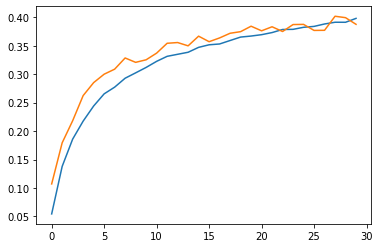

In [19]:
pyplot.plot(range(0,epochs2), history2.history['accuracy'])
pyplot.plot(range(0,epochs2), history2.history['val_accuracy'])

Looks like adding dropouts decreased the distance between training and test accuracy. It's probably because the model don't overfit to the training data.
Also notice the some places in the plot where test accuracy became higher than the train thing.